In [40]:
import pandas as pd
from m2p import PolyMaker
from rdkit import Chem

pm = PolyMaker()

# Generate Thermoplastics Using All Mechanisms

In [41]:
# create dataset
data = pd.DataFrame({'smiles':['C=C','C=CC','O=C(O)c1ccc(C(=O)O)cc1.OCCO','C=C.C=CC']},
                    index=['PE','PP','PET','PE-co-PP'])

# get monomers from smiiles strings
data['monomers'] = data.smiles.apply(lambda s: pm.get_monomers(s))

# polymerize 
data = pm.thermoplastic(data,DP=5,mechanism='all',replicate_structures=3)

# output
data.head(12)

100%|██████████| 12/12 [00:00<00:00, 26.49it/s]


,smiles,monomers,distribution,replicate_structure,polymer,mechanism
PE,C=C,"('C=C',)",[],0,CCCCCCCCCC,vinyl
PE-co-PP,C=C.C=CC,"('C=C', 'C=CC')",[],0,CCCCCCCCCC,vinyl
PET,O=C(O)c1ccc(C(=O)O)cc1.OCCO,"('O=C(O)c1ccc(C(=O)O)cc1', 'OCCO')",[],0,O=C(OCCO)c1ccc(C(=O)OCCOC(=O)c2ccc(C(=O)OCCO)c...,ester
PP,C=CC,"('C=CC',)",[],0,CCCCC(C)CC(C)C(C)CC(C)C,vinyl
PE,C=C,"('C=C',)",[],1,CCCCCCCCCC,vinyl
PE-co-PP,C=C.C=CC,"('C=C', 'C=CC')",[],1,CCCCCCCCCCCC,vinyl
PET,O=C(O)c1ccc(C(=O)O)cc1.OCCO,"('O=C(O)c1ccc(C(=O)O)cc1', 'OCCO')",[],1,O=C(OCCO)c1ccc(C(=O)OCCOC(=O)c2ccc(C(=O)OCCO)c...,ester
PP,C=CC,"('C=CC',)",[],1,CC(C)CC(C)CC(C)C(C)CC(C)C,vinyl
PE,C=C,"('C=C',)",[],2,CCCCCCCCCC,vinyl
PE-co-PP,C=C.C=CC,"('C=C', 'C=CC')",[],2,CC(C)CC(C)CCCC(C)C(C)C,vinyl


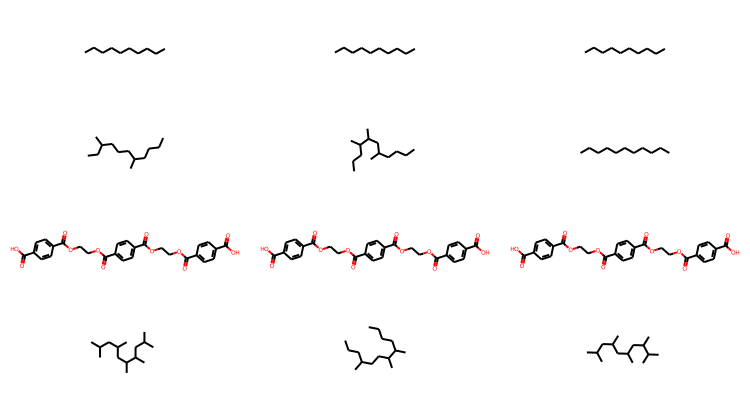

In [3]:
# draw
Chem.Draw.MolsToGridImage([Chem.MolFromSmiles(s) for s in data.sort_index().polymer],molsPerRow=3, subImgSize=(250, 100))

# Generate Thermoplastic Using Esterification with Tacticity Control

## Generate Three Polymers -- Syndiotactic (pm = 0), Isotactic (pm = 1), Atactic (pm = 0.5)

In [42]:
pm = PolyMaker()

# Define monomer inputs
# smiles are given in one string of as many monomers as desired, with like monomers in order.
# Stereoisomers are assumed to be R.S for consistency across monomers.
polymer_name = ['poly(RS-3-hydroxybutyrate)']
smiles = ['C[C@@H](O)CC(=O)O.C[C@H](O)CC(=O)O']

# define input dataframe
poly_df = pd.DataFrame({'smiles':smiles}, index=polymer_name)
poly_df['monomers'] = poly_df.smiles.apply(
    lambda s: pm.get_monomers(s, stereochemistry=True)
    )

# Distribution 
# Length of monomers (or single value), doesn't have to add up to any specific value
distribution = [1]

replicate_structures = 1

# Syndiotactic
pmeso = 0
# Create polymer
poly_df = pm.thermoplastic(
    poly_df,
    DP=10,
    mechanism='ester_stereo',
    pm=pmeso,
    replicate_structures=replicate_structures
)

syn_smiles = poly_df["polymer"][0]

# Atactic
pmeso = 0.5

# Create polymer
poly_df = pm.thermoplastic(
    poly_df,
    DP=10,
    mechanism='ester_stereo',
    pm=pmeso,
    replicate_structures=replicate_structures
)

a_smiles = poly_df["polymer"][0]

# Isotactic
pmeso = 1

# Create polymer
poly_df = pm.thermoplastic(
    poly_df,
    DP=10,
    mechanism='ester_stereo',
    pm=pmeso,
    replicate_structures=replicate_structures
)

iso_smiles = poly_df["polymer"][0]


100%|██████████| 1/1 [00:00<00:00,  8.00it/s]


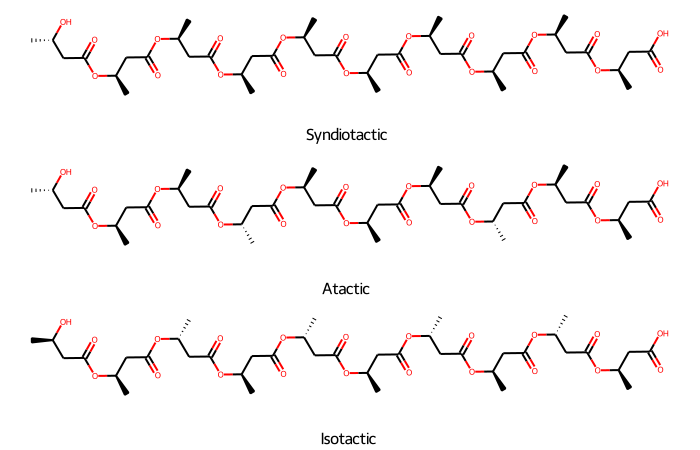

In [43]:
# draw results
legends = ["Syndiotactic", "Atactic", "Isotactic"]
Chem.Draw.MolsToGridImage(
    [Chem.MolFromSmiles(s) for s in [syn_smiles, a_smiles, iso_smiles]],
    molsPerRow=1,
    subImgSize=[700, 150],
    legends=legends
    )

## Method to get chirality of each stereocenter

In [48]:
def get_RS(smi):
    mol = Chem.MolFromSmiles(smi)
    chiral_centers = {}
    for i, atom in enumerate(mol.GetAtoms()):
        try:
            chiral_centers[i] = atom.GetProp('_CIPCode')
        except:
            pass
    
    return chiral_centers

# Syndiotactic alternates
print("Syndiotactic:", get_RS(syn_smiles))
# Isotactic is same
print("Isotactic:", get_RS(iso_smiles))
# Atactic is random
print("Atactic: ", get_RS(a_smiles))

Syndiotactic: {1: 'S', 7: 'R', 13: 'S', 19: 'R', 25: 'S', 31: 'R', 37: 'S', 43: 'R', 49: 'S', 55: 'R'}
Isotactic: {1: 'R', 7: 'R', 13: 'R', 19: 'R', 25: 'R', 31: 'R', 37: 'R', 43: 'R', 49: 'R', 55: 'R'}
Atactic:  {1: 'S', 7: 'R', 13: 'S', 19: 'S', 25: 'S', 31: 'R', 37: 'S', 43: 'S', 49: 'S', 55: 'R'}


# Generate Copolymers with Stereo and Distribution Control

In [49]:
pm = PolyMaker()

# Define monomer inputs
# smiles are given in one string of as many monomers as desired, with like monomers in order.
# Stereoisomers are assumed to be R.S for consistency across monomers.
polymer_name = ['poly(RS-3-hydroxybutyrate).poly(RS-lactic-acid']
smiles = ['C[C@@H](O)CC(=O)O.C[C@H](O)CC(=O)O.CCCC[C@@H](O)CC(=O)O.CCCC[C@H](O)CC(=O)O']

# define input dataframe
poly_df = pd.DataFrame({'smiles':smiles}, index=polymer_name)
poly_df['monomers'] = poly_df.smiles.apply(
    lambda s: pm.get_monomers(s, stereochemistry=True)
    )

replicate_structures = 1

# Syndiotactic 75 A to 25 B
pmeso = 0
distribution = [75, 25]
# Create polymer
poly_df = pm.thermoplastic(
    poly_df,
    DP=10,
    mechanism='ester_stereo',
    pm=pmeso,
    replicate_structures=replicate_structures,
    distribution=distribution
)

syn_smiles = poly_df["polymer"][0]

# Atactic 25 A to 75 B
pmeso = 0.5
distribution= [25, 0]
# Create polymer
poly_df = pm.thermoplastic(
    poly_df,
    DP=10,
    mechanism='ester_stereo',
    pm=pmeso,
    replicate_structures=replicate_structures,
    distribution=distribution
)

a_smiles = poly_df["polymer"][0]

# Isotactic 50 A to 50 B
pmeso = 1
distribution = [50, 50]
# Create polymer
poly_df = pm.thermoplastic(
    poly_df,
    DP=10,
    mechanism='ester_stereo',
    pm=pmeso,
    replicate_structures=replicate_structures,
    distribution=distribution
)

iso_smiles = poly_df["polymer"][0]


100%|██████████| 1/1 [00:00<00:00,  9.39it/s]


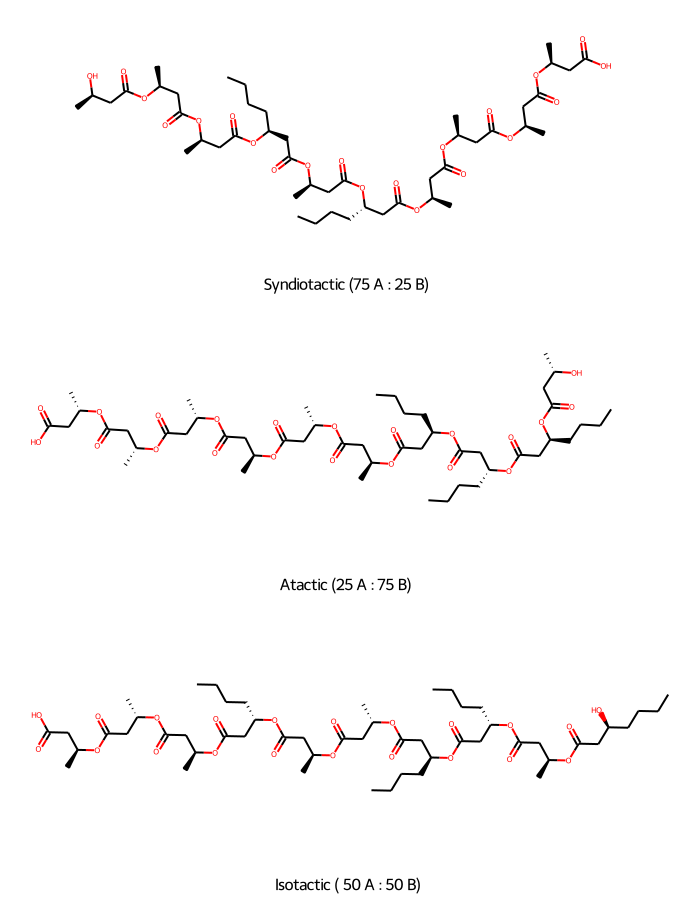

In [50]:
# draw
legends = ["Syndiotactic (75 A : 25 B)", "Atactic (25 A : 75 B)", "Isotactic ( 50 A : 50 B)"]
Chem.Draw.MolsToGridImage(
    [Chem.MolFromSmiles(s) for s in [syn_smiles, a_smiles, iso_smiles]],
    molsPerRow=1,
    subImgSize=[700, 300],
    legends=legends
    )